<a href="https://colab.research.google.com/github/jiieunx/datacampus/blob/master/%EC%88%99%EC%8B%9D_%EC%9E%AC%EB%B2%94%ED%9A%9F%EC%88%98%EB%B3%84%EB%A1%9C_0829.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#설치파일 , 글꼴 돌리고 다시시작 

# 설치파일


In [ ]:
!apt-get update

!apt-get install g++ openjdk-8-jdk python-dev python3-dev

!pip3 install JPype1-py3

!pip3 install konlpy

!JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:7 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Hit:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python

In [ ]:
import pandas as pd #판다스 패키지 불러오기
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud 
import numpy as np


import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings(action = 'ignore')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import jpype
print(jpype.isJVMStarted()) #return False:not running or 0:running

False


In [ ]:
!pip install customized_konlpy

In [ ]:
from konlpy.tag import Twitter 
from ckonlpy.tag import Twitter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 0-1) 글꼴

In [ ]:
# 일단 import 
%matplotlib inline  
import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

In [ ]:
#나눔고딕인스톨
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
# 체크해보면 폰트 개수가 늘어났다
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 70
nanum_font number: 31


In [ ]:
# 한번 프린트 해보자
nanum_font

['/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf',
 '/usr/share/fonts/t

In [ ]:
# 현재 설정되어 있는 폰트 사이즈와 글꼴을 알아보자
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()

Python 3.6.9
설정 폰트 글꼴: ['sans-serif'], 설정 폰트 사이즈: 10.0


In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumGothic


In [ ]:
data = np.random.randint(-200, 100, 50).cumsum()
data

array([ -147,   -58,    38,   -20,   -45,  -134,  -224,  -351,  -493,
        -415,  -357,  -277,  -384,  -425,  -623,  -556,  -583,  -657,
        -823,  -839,  -854,  -965, -1065, -1223, -1397, -1518, -1668,
       -1831, -1844, -2021, -2006, -2066, -2131, -2306, -2362, -2310,
       -2349, -2345, -2432, -2483, -2629, -2704, -2842, -2894, -2814,
       -2836, -2978, -2910, -3031, -3159])

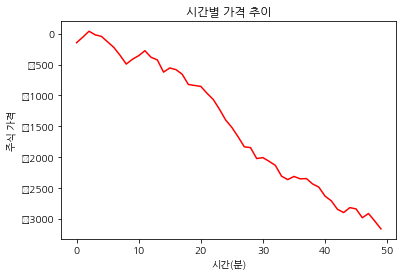

In [ ]:
# 그래프를 그려보자. 하지만 한글은 깨진다
plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')
plt.style.use('seaborn-pastel')
plt.show()

In [ ]:
fm._rebuild()

#1)전처리

In [ ]:
df = pd.read_excel('data2_5.xlsx')
df.head()

,DSJ_CARD_NO,DSJ_JUMIN_NO,CONSULT_DATE,CARE_OPEN_CLASS_NM,CONSULT_CONT,JAEBUM,JAEBUM_1,출생년도,연령,학력,죄명,CARE_OPEN_CLASS_NM_1
0,100020070001,M0vQhLryshtSgdzJk9KWew==,20140325,50,상기자는 주소지에 거주하면서 가정환경에 잘 적응하고 있어 보호상 문제는 없어 보임....,0,0,1959,50,1,20,50
1,100020070001,M0vQhLryshtSgdzJk9KWew==,20130109,20,계사년 새해를 맞아 저축을 통한 자립에 힘써 줄 것과 준법심을 고취하여 건전한 사회...,0,0,1959,50,1,20,110
2,100020070001,M0vQhLryshtSgdzJk9KWew==,20140227,50,상기자는 승일기업 도장공으로 근무하면서 자립을 위해 성실히 저축에 임하고 있어 보호...,0,0,1959,50,1,20,50
3,100020070001,M0vQhLryshtSgdzJk9KWew==,20130611,50,상기자는 주거지원 만기도래(2013.7.31)로 기간연장의 필요성이 있어 본인과 직...,0,0,1959,50,1,20,50
4,100020070001,M0vQhLryshtSgdzJk9KWew==,20131230,50,2013년 연말을 맞아 화목한 가정생활과 안정된 자립대책 마련에 최선을 다해 줄 것...,0,0,1959,50,1,20,50


In [ ]:
#청소년 제외 기존 숙식제공만 뽑았을때 93390 rows × 12 columns이고 청소년 제외하고 뽑을때 82554 rows × 12 columns 로 데이터가 줄어듬을 확인할 수 있다 
df = df[(df['CARE_OPEN_CLASS_NM']==10) & (df['연령']!=10)]
df

,DSJ_CARD_NO,DSJ_JUMIN_NO,CONSULT_DATE,CARE_OPEN_CLASS_NM,CONSULT_CONT,JAEBUM,JAEBUM_1,출생년도,연령,학력,죄명,CARE_OPEN_CLASS_NM_1
460,100020100078,x4IdPpcY90s/iD0RH7wykQ==,20160927,10,대상자가 기술교육원 야간반 과정에 참여하고자 함에 따라 수료시까지 성실히 교육에 ...,0,1,1982,30,1,40,10
1103,100020110062,pWNplgZrM5H8IFl7FspEnw==,20130419,10,귀소여부에 대해 물어보았으며 금주는 귀소하여 쉬다가 출근할 계획이라고 하여 안전사고...,0,1,1986,20,1,20,10
1105,100020110062,pWNplgZrM5H8IFl7FspEnw==,20130620,10,최근 상황에 대해 청취하고 귀소여부에 대해 물어보았으며 향후 기간만료가 다가오고 있...,0,1,1986,20,1,20,10
1106,100020110062,pWNplgZrM5H8IFl7FspEnw==,20130628,10,2년 만기가 다가와 숙소를 구해 퇴소하게 되었으며 퇴소후에도 꾸준히 노력하여 반드시...,0,1,1986,20,1,20,10
1107,100020110062,pWNplgZrM5H8IFl7FspEnw==,20130217,10,회사 숙소에서 생활하는데 대한 문제점과 회사생활의 애로사항 등에 대해 청취하였으며 ...,0,1,1986,20,1,20,10
...,...,...,...,...,...,...,...,...,...,...,...,...
270219,90020200457,QavnP/cLBhgcmExbuFIpYA==,20200714,10,"허그일자리지원프로그램 참여 독려하여 구직응원하자, 현재 보호관찰 교육 등으로 훈련일...",0,0,1997,20,1,80,10
270220,90020200457,QavnP/cLBhgcmExbuFIpYA==,20200625,10,"상기인은 숙식 생활을 한지는 오래되지 않았지만, 앞으로 열심히 생활할 것을 당부하고...",0,0,1997,20,1,80,10
270221,90020200457,QavnP/cLBhgcmExbuFIpYA==,20200618,10,부산보호관찰소 의뢰로 숙식임시보호개시함. 숙식과 관련된 제반사항 안내 및 초도지급품...,0,0,1997,20,1,80,10
270222,90020200457,QavnP/cLBhgcmExbuFIpYA==,20200623,10,사회성향상교육참여하여 멘토의 강연에 집중하는 모습보임. 숙식생활에 애로점이 있다하더...,0,0,1997,20,1,80,10


In [ ]:
a = df['JAEBUM_1']
pro = pd.value_counts(a)

pro = pd.DataFrame(pro)
pro

,JAEBUM_1
0,50766
1,31788


In [ ]:
a = df['JAEBUM']
pro = pd.value_counts(a)

pro = pd.DataFrame(pro)
pro

,JAEBUM
0,64687
1,13002
2,3469
3,1044
4,273
5,52
6,23
8,4


In [ ]:
a0 = df[df['JAEBUM_1']==0]
len(a0)

50766

In [ ]:
a1 =df[(df['JAEBUM']>=1) & (df['JAEBUM']<2)]
len(a1)

13002

In [ ]:
a2 = df[df['JAEBUM']>=2]
len(a2)

4865

In [ ]:
df0 = df[df['JAEBUM_1']==0]
df1 = df[(df['JAEBUM']>=1) & (df['JAEBUM']<2)]
df2 = df[df['JAEBUM']>=2]

In [ ]:
df0

,DSJ_CARD_NO,DSJ_JUMIN_NO,CONSULT_DATE,CARE_OPEN_CLASS_NM,CONSULT_CONT,JAEBUM,JAEBUM_1,출생년도,연령,학력,죄명,CARE_OPEN_CLASS_NM_1
1617,100020110253,OdSPxwP3FONB1ItOzZCRZg==,20130527,10,숙식 기간 만료가 다가와 면담을 실시하였으며 성실히 노력해 오던중 최근 2~3개월 ...,0,0,1952,60,1,40,10
1618,100020110253,OdSPxwP3FONB1ItOzZCRZg==,20130922,10,최근 퇴소를 하고 외부에 방을 얻어 생활하는 문제를 고려중에 있다고 하여 아직 숙식...,0,0,1952,60,1,40,10
1620,100020110253,OdSPxwP3FONB1ItOzZCRZg==,20131015,10,현재 지내는 곳의 상황과 업무에 대해 얘기하였으며 항상 건강관리를 잘해 무사히 자립...,0,0,1952,60,1,40,10
1621,100020110253,OdSPxwP3FONB1ItOzZCRZg==,20130213,10,늘 한결같은 모습으로 맡은 일을 성실히 하고 있어 격려하고 자립에 성공하는 그날까지...,0,0,1952,60,1,40,10
1622,100020110253,OdSPxwP3FONB1ItOzZCRZg==,20130814,10,성실히 자립을 위해 노력하고 있어 격려하고 자립에 완전히 성공할 수 있도록 최선을 ...,0,0,1952,60,1,40,10
...,...,...,...,...,...,...,...,...,...,...,...,...
270219,90020200457,QavnP/cLBhgcmExbuFIpYA==,20200714,10,"허그일자리지원프로그램 참여 독려하여 구직응원하자, 현재 보호관찰 교육 등으로 훈련일...",0,0,1997,20,1,80,10
270220,90020200457,QavnP/cLBhgcmExbuFIpYA==,20200625,10,"상기인은 숙식 생활을 한지는 오래되지 않았지만, 앞으로 열심히 생활할 것을 당부하고...",0,0,1997,20,1,80,10
270221,90020200457,QavnP/cLBhgcmExbuFIpYA==,20200618,10,부산보호관찰소 의뢰로 숙식임시보호개시함. 숙식과 관련된 제반사항 안내 및 초도지급품...,0,0,1997,20,1,80,10
270222,90020200457,QavnP/cLBhgcmExbuFIpYA==,20200623,10,사회성향상교육참여하여 멘토의 강연에 집중하는 모습보임. 숙식생활에 애로점이 있다하더...,0,0,1997,20,1,80,10


In [ ]:
df1

,DSJ_CARD_NO,DSJ_JUMIN_NO,CONSULT_DATE,CARE_OPEN_CLASS_NM,CONSULT_CONT,JAEBUM,JAEBUM_1,출생년도,연령,학력,죄명,CARE_OPEN_CLASS_NM_1
2987,100020120350,JZhQVkCinM4jsYRb2LCHdQ==,20130702,10,생활관 입소로 자립동기를 부여하고 성실히 사회봉사 명령을 이수하고 취업처 확보 등 ...,1,1,1960,50,1,990,10
2988,100020120350,JZhQVkCinM4jsYRb2LCHdQ==,20130821,10,지인의 소개로 평택 지역에서 숙식을 하며 일을 하게 되어 퇴소를 희망해 어디에 가던...,1,1,1960,50,1,990,10
3175,100020120377,+UBYPb1dGmnNpFOdUzNZUw==,20130822,10,최근 방동료와 사소한 문제로 다툼이 있었으며 그로인해 동료가 퇴소하였으며 서로간의 ...,1,1,1968,40,1,40,10
3176,100020120377,+UBYPb1dGmnNpFOdUzNZUw==,20130128,10,"심리적 성격적 특성을 파악하기 위해 과거력, 정신질환의 유무, 가족관계 등에 대한 ...",1,1,1968,40,1,40,10
3177,100020120377,+UBYPb1dGmnNpFOdUzNZUw==,20130129,10,심리검사 해석상담 실시\r\n종교나 독서에만 집중하기보다 과거의 경력을 살려서 전문...,1,1,1968,40,1,40,10
...,...,...,...,...,...,...,...,...,...,...,...,...
270207,90020200417,MdHkK9Sy1XgjUSNiyEmspw==,20200609,10,"상기인은 공단에서 숙식제공을 받고 있으며, 현재의 생활에 만족한다고함. 되도록 긴 ...",1,1,1974,40,1,20,10
270208,90020200417,MdHkK9Sy1XgjUSNiyEmspw==,20200713,10,지부로 유선연락와 금일 외박귀소예정이던 것을 하루 연장해야겠다고 함. 부친이 본인에...,1,1,1974,40,1,20,10
270209,90020200417,MdHkK9Sy1XgjUSNiyEmspw==,20200721,10,교정기관 입소 전 근로활동임금 받지 못한 것 처리위해 관공서를 다닐일이 있는데 교통...,1,1,1974,40,1,20,10
270210,90020200417,MdHkK9Sy1XgjUSNiyEmspw==,20200707,10,"상기인은 당일 외박을 하여야하는 상황이라 당직근무자에게 말하였으며, 상기인과 통화를...",1,1,1974,40,1,20,10


In [ ]:
df2

,DSJ_CARD_NO,DSJ_JUMIN_NO,CONSULT_DATE,CARE_OPEN_CLASS_NM,CONSULT_CONT,JAEBUM,JAEBUM_1,출생년도,연령,학력,죄명,CARE_OPEN_CLASS_NM_1
2849,100020120324,MBiPin0ABhO3oJgcITBTEA==,20130411,10,6개월 기간이 만료되었으며 본인이 최근 문제로 인해 연장의사가 없어 직업훈련 보호전...,2,1,1971,40,1,20,10
2850,100020120324,MBiPin0ABhO3oJgcITBTEA==,20130226,10,성실히 지내며 보다 노력해 줄것을 당부하고 직업훈련 및 취업활동을 병행하는데 대한 ...,2,1,1971,40,1,20,10
2851,100020120324,MBiPin0ABhO3oJgcITBTEA==,20130312,10,최근 사회봉사명령이 끝이 났다고 하며 이제 열심히 일도 하고 교육도 성실히 받으며 ...,2,1,1971,40,1,20,10
2852,100020120324,MBiPin0ABhO3oJgcITBTEA==,20130404,10,최근 두차례 술을 마시고 귀소를 하였으며 그 와중에 방동료와 불미스런 일이 발생하여...,2,1,1971,40,1,20,10
2854,100020120324,MBiPin0ABhO3oJgcITBTEA==,20130716,10,최근 들어 채무변제를 하기 위해 노력하고 있어 저축실적이 개선되지 않고 있다고 하여...,2,1,1971,40,1,20,10
...,...,...,...,...,...,...,...,...,...,...,...,...
270046,90020200219,fOXwpXAuEZTLWsD4V4iz8g==,20200402,10,"구충제 제공하고 복용방법 안내함. 아직까지 생활하는 데 큰 어려움 없으며, 본인이 ...",2,1,1995,20,1,80,10
270047,90020200219,fOXwpXAuEZTLWsD4V4iz8g==,20200402,10,생활관에서 첫날은 별불편함없이 지냈다고 하였음\r\n오전에는 방역활동에도 성실히 참...,2,1,1995,20,1,80,10
270048,90020200219,fOXwpXAuEZTLWsD4V4iz8g==,20200603,10,"여전히 유선상연락되지않는 상황으로, 보호정지기간 만료됨에 따라 보호종료처리함.",2,1,1995,20,1,80,10
270049,90020200219,fOXwpXAuEZTLWsD4V4iz8g==,20200424,10,생활관에서 생활한지 3주 이상 지나서 계획을 확인함\r\n본인은 친구의 집에서 거주...,2,1,1995,20,1,80,10


In [ ]:
twitter = Twitter() 
twitter.add_dictionary(['당직자','허그집단프로그램', '숙식보호', '직업훈련', '적극적', '보호관찰', '프로그램 종료', '지원이유', '지금', '특별한사항', '이행사항', '용접기술교육원', '취업알선', '특수용접기능사', '유의사항', '취업박람회', '허그일자리프로그램', '건강관리', '긴급원호', '상기 인', '야간반', '여성기술교육원', '용접배관', '주거지원자', '가족관계', '허그일자리지원프로그램', '고용보험', '상기자', '영농기술교육원', '안전사고', '안정적', '준수사항', '보호종료', '취업지원 프로그램', '구직활동', '대형면허', '건축도장기능사', '건강문제', '친구들', '거주지', '집단상담', '시설관리직', '필기합격', '긍정적', '주거지원', '출결관리', '가족부양', '참여자', '허그 일자리 프로그램', '전기기술교육원', '이행상황', '자기관리', '기술교육원', '기초수급자', '정산금', '특이사항', '애로사항', '용접기능사', '사후관리', '보호관찰법', '기계가공기술교육원', '지원기회', '보호사업', '보호관찰소', '생활 준칙', '위문물품', '법무보호가족교육원', '실기합격', '주거지', '지출관리', '외출 요청', '예치금', '생활관 준칙', '합동결혼식', '용접기능훈련', '미납금', '상기 대상자', '사회성향상 프로그램', '규칙적', '가족희망센터', '몸관리', '상기인', '보호관찰소장', '안전관리', '경제적', '입주자', '취업성공패키지', '보호위원', '허그일자리 프로그램', '허그일자리사업', '집단프로그램', '기초수급', '장기간', '허그 일자리 집단프로그램', '보호종료자', '자동차정비기술교육원', '허그일자리', '식구들', '변동사항', '생활관준칙', '용접훈련', '자립이행상황통보서'], 'Noun')

In [ ]:
from ckonlpy.tag import Postprocessor


stopwords= ['도록', '만원','개월','금일', '기간','겨울','년도', '날짜','금월','까지', '날씨', '어제', '이번','지금','최근', '추후','하루', '한번', '항상','현재','시일','오늘','조기','그동안','다음주',
        '평소','차후','지난','요즘','아침','오전','오후','예전','한해','전일','여름','시기', '가끔','사이','최종','명일',
        #지역 위치나타내는 단어
        '경기도','김해','서울','울산','천안',
        #필요없어보이는 단어
          '격려', '결과', '경우', '계속', '계획', '공단', '과정', '관련', '관리','근황','기관','보호', '본인','다른', '다소', '다시', '다음', '담당', '담당자', '당부',
        '대상자', '독려',  '마련','멘토링','문자', '문제', '발생', '방문', '보고','상기인', '상담', '상태', '상황', '생활', '생활관', '소하', '숙식', '스스로', '시간', '실시',
        '아직', '여건', '연락', '예정', '외박', '외출', '요청','유의','이야기', '이행','이후', '입소', '자신', '작성','전화','정리', '정적', '제공', '제출', '조치', '종료', '주거', 
        '주거지', '주거지원', '준비','지도','지원', '지지', '직원', '진행', '참여', '처리','통보','퇴소','확인', '활동','변경','가능','일부','심사','결정','전환','강조', '패키지',
        '보호종료','개시','동일','파악','재차','사용','주기','연결','마무리', '사실','기재','얼마','의사','사료','변동','참여자','기타','단계','완료', '귀하','혼자','당장','가장',
         '해당','해지','인계','각종', '번호','취지','참고','보도','약간','대신','진단','물음','회의','양해','완전','유선','부분','만료',
        #걸러야하는 단어
        '가지','고자', '고함','구들', '금은','기반', '기하','동안', '되어', '드림', '때문', '또한', '려고', '로부터','다해' ,'대하', '대한', '대해', '더욱', '도로', '도록'
        '만원', '만큼' , '면서', '모습', '문하', '바로',  '보이', '보임','부분계획', '부터', '부하', '사항', '상기', '않아', '양곡','어서','위해', '유의면서','이행상',
        '인의', '인하','있는', '있다고', '있도록', '있어', '있으며', '있음', '자로','전하', '전함','정도','중이', '중임', '지부', '지소', '통해','특이', '하겠다고', '하고',
        '하고자', '하기', '하는', '하도록','하며', '하면서', '하여', '하였으며', '하였음', '하자', '하지','해주','통한','다가','처럼','하라','주지','무하','더라도','요하',
        '여부','중인','달라', '물어','어가','상의','고하','라하','대로','어보','지고','이하','한지','각하','영하','알리','여러','바란','아무','이제','서도','당하','여서',
        '립하','보기','로서','도래','지원이','남지','가기','지원기','조리','간다','만하','주어','시킴', '리지','아지','고용보', '족하','어도','성하','교하','일이','기해','시운전',
        '일해','해하','달이','결하','조성하','제하','장일','도중','소가','심해','일어','일도','을시',
        
        '자립','성실','노력','열심','희망']


replace = {'거주지': '주거지', "행동":"태도", "통화":"전화", "연락":"통화", "애로":"특이","주의":"유의", "상황":"상태","열심":"성실", "불편":"어려움", "관리":"조치", '근로':'근무', '근속':'근무', '주의':'유의', '지지':'독려', '격려':'독려', '열심':'노력', '애로':'필요', '어려움':'문제', '하라':'독려', '유선':'연락', '전화':'연락', '의지':'노력', '지부':'공단', '지금':'현재', '회사':'일자리', '오늘':'현재'}
postprocessor = Postprocessor(twitter, replace = replace, passtags = 'Noun', stopwords = stopwords)

In [ ]:
#불용어 처리
#날짜 계정 등 시기를 나타내는 단어

# postprocessor.pos(data)

def twtt(dfname):  
  lists = np.array(dfname['CONSULT_CONT'].tolist())

  dfname = np.array(dfname['CONSULT_CONT'].tolist())

  morphs = [] 
  for sentence in lists: 
    morphs.append(postprocessor.pos(sentence)) 

  noun=[] 

  for sentence in morphs : 
    for word, tag in sentence : 
      if tag in ['Noun'] and ("것" not in word) and ("내" not in word)and ("나" not in word) and ("수" not in word) and ("게"not in word) and ("말"not in word): 
          if len(word) > 1:
            noun.append(word)
  count = Counter(noun)
  words = dict(count.most_common(150))
  return words


#df0

In [ ]:
words0=twtt(df0)

In [ ]:
# removewords = []


# for i in removewords:
#   if i in words0:
#     del words0[i]
#   else:
#     pass

In [ ]:

np.array(words0)

array({'취업': 18196, '근무': 11383, '저축': 8955, '건강': 4855, '교육': 4217, '일자리': 4189, '건강관리': 4178, '면담': 4081, '병원': 3037, '지속': 2902, '문제': 2881, '연장': 2847, '신청': 2774, '취득': 2713, '생각': 2385, '사회': 2274, '개인': 2213, '치료': 2170, '유의': 2142, '일용직': 2072, '가족': 2016, '자격증': 1993, '음주': 1973, '최선': 1947, '복귀': 1894, '현장': 1863, '사무실': 1852, '허그일자리': 1818, '적응': 1782, '운전': 1778, '안정적': 1772, '구직활동': 1739, '필요': 1730, '출근': 1713, '전달': 1711, '시험': 1691, '마음': 1679, '노력': 1648, '특이사항': 1593, '장기': 1589, '업체': 1578, '애로사항': 1572, '어려움': 1569, '신경': 1562, '야간': 1548, '직장': 1545, '사람': 1544, '용접': 1540, '조금': 1497, '성공': 1477, '규칙': 1450, '아보': 1412, '지인': 1406, '권유': 1400, '관계': 1385, '면접': 1368, '향후': 1366, '적극적': 1362, '직업훈련': 1347, '특별': 1344, '상기자': 1339, '철저': 1328, '예치금': 1321, '저녁': 1315, '약속': 1302, '도움': 1288, '안전': 1284, '태도': 1273, '설명': 1270, '건설': 1262, '동료': 1257, '축하': 1207, '이상': 1207, '조언': 1198, '당번': 1194, '휴식': 1189, '회복': 1187, '청소': 1182, '업무': 1175, '시작': 1171, '안전사고': 1

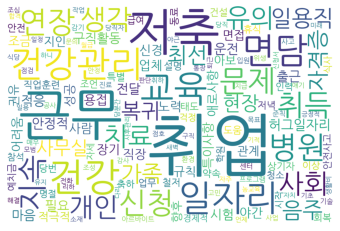

In [ ]:
wordcloud = WordCloud(font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' ,background_color='white',width=1500, height=1000).generate_from_frequencies(words0) 
plt.imshow(wordcloud) 
plt.axis('off')
plt.show()
wordcloud.to_file('숙식_초범_wordcloud.png')

In [ ]:
word_list = sorted(words0.items(), key=lambda x: x[1], reverse=True)


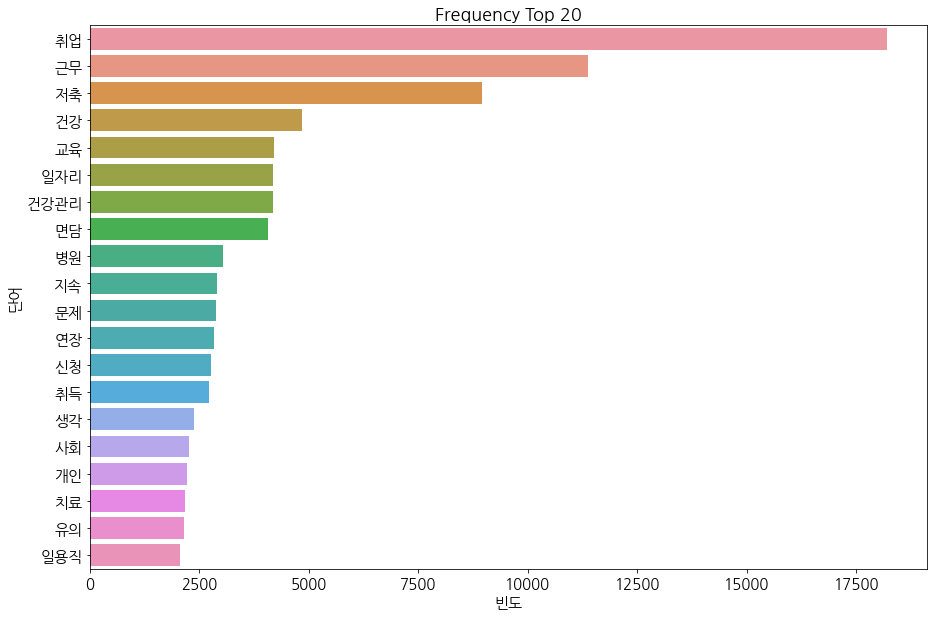

In [ ]:
plt.rc('font',size=15)
fontprop = fm.FontProperties(fname= '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', size=20)
fig = plt.figure(figsize=(15,10))
fig.patch.set_facecolor('white')
max = 20
sns_plot=sns.barplot([i[1] for i in word_list[:max]],
            [i[0] for i in word_list[:max]])
sns_plot.set_title("Frequency Top 20")
sns_plot.set_ylabel("단어")
sns_plot.set_xlabel("빈도")
fig = sns_plot.get_figure()
fig.savefig('숙식_초범_빈도.png')

# df1

In [ ]:
words1=twtt(df1)

In [ ]:
words1

{'가족': 418,
 '감기': 215,
 '개인': 594,
 '거주': 175,
 '걱정': 228,
 '건강': 1072,
 '건강관리': 827,
 '건설': 352,
 '경제적': 308,
 '고민': 194,
 '고지': 191,
 '공사': 171,
 '관계': 358,
 '교육': 1120,
 '구직': 185,
 '구직활동': 422,
 '권유': 417,
 '규칙': 529,
 '근무': 2852,
 '급여': 254,
 '기술': 263,
 '기적': 189,
 '기초': 362,
 '노력': 430,
 '농교육': 229,
 '당번': 268,
 '당직': 226,
 '당직자': 273,
 '도움': 326,
 '동료': 380,
 '마음': 395,
 '매우': 176,
 '매진': 166,
 '면담': 1004,
 '면접': 352,
 '명절': 274,
 '모범': 170,
 '목표': 166,
 '문의': 170,
 '문제': 802,
 '미래': 181,
 '병원': 858,
 '복귀': 526,
 '사고': 291,
 '사람': 371,
 '사무실': 491,
 '사업': 186,
 '사회': 716,
 '상기자': 383,
 '새벽': 179,
 '생각': 574,
 '생활비': 272,
 '설명': 413,
 '성공': 382,
 '센터': 224,
 '소재': 273,
 '숙식보호': 176,
 '시작': 306,
 '시험': 255,
 '식당': 280,
 '식사': 257,
 '신경': 369,
 '신청': 866,
 '아르바이트': 191,
 '아보': 297,
 '안전': 339,
 '안전사고': 269,
 '안정': 253,
 '안정적': 504,
 '애로사항': 420,
 '야간': 380,
 '약속': 435,
 '얘기': 229,
 '어려움': 357,
 '언제': 185,
 '업무': 314,
 '업체': 346,
 '연장': 548,
 '예치금': 393,
 '용접': 356,
 '운전': 430,
 '

In [ ]:
# removewords= []
# for i in removewords:
#   if i in words1:
#     del words1[i]
#   else:
#     pass

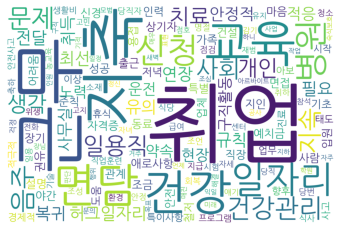

In [ ]:
wordcloud = WordCloud(font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' ,background_color='white',width=1500, height=1000).generate_from_frequencies(words1) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()
wordcloud.to_file('숙식_재범1번_wordcloud.png')

In [ ]:
word_list = sorted(words1.items(), key=lambda x: x[1], reverse=True)


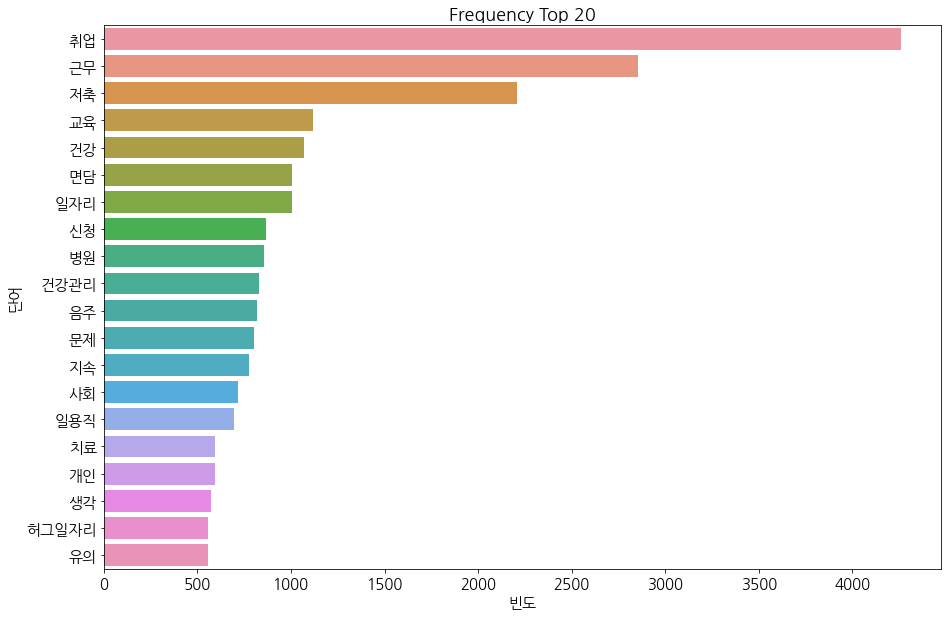

In [ ]:
plt.rc('font',size=15)
fontprop = fm.FontProperties(fname= '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', size=20)
fig = plt.figure(figsize=(15,10))
fig.patch.set_facecolor('white')
max = 20
sns_plot=sns.barplot([i[1] for i in word_list[:max]],
            [i[0] for i in word_list[:max]])
sns_plot.set_title("Frequency Top 20")
sns_plot.set_ylabel("단어")
sns_plot.set_xlabel("빈도")
fig = sns_plot.get_figure()
fig.savefig('숙식_재범1번_빈도.png')

#df2

In [ ]:
words2=twtt(df2)

In [ ]:
words2

{'가족': 172,
 '감기': 104,
 '감사': 69,
 '개인': 241,
 '거주': 78,
 '거처': 83,
 '걱정': 65,
 '건강': 426,
 '건강관리': 312,
 '건설': 104,
 '경제적': 138,
 '고민': 79,
 '고지': 84,
 '공사': 67,
 '과거': 71,
 '관계': 145,
 '교육': 419,
 '구직': 64,
 '구직활동': 183,
 '권유': 120,
 '규칙': 221,
 '근무': 1073,
 '금지': 66,
 '기술': 123,
 '기적': 69,
 '기초': 120,
 '노력': 170,
 '농교육': 113,
 '당번': 100,
 '당분간': 64,
 '당직': 109,
 '당직자': 97,
 '대리': 72,
 '도움': 156,
 '동료': 137,
 '마음': 153,
 '매우': 84,
 '매진': 63,
 '면담': 414,
 '면접': 77,
 '명절': 97,
 '무단': 70,
 '문의': 77,
 '문제': 328,
 '병원': 335,
 '복귀': 196,
 '사고': 108,
 '사람': 183,
 '사무실': 172,
 '사업': 77,
 '사회': 252,
 '상기자': 132,
 '새벽': 102,
 '생각': 194,
 '생활비': 97,
 '설명': 156,
 '성공': 138,
 '성향': 69,
 '센터': 68,
 '소재': 111,
 '시작': 103,
 '시험': 86,
 '식당': 108,
 '식사': 111,
 '신경': 114,
 '신청': 275,
 '아보': 129,
 '안전': 113,
 '안전사고': 64,
 '안정': 77,
 '안정적': 166,
 '애로사항': 134,
 '야간': 97,
 '약속': 175,
 '얘기': 103,
 '어려움': 135,
 '언제': 65,
 '업무': 101,
 '업체': 146,
 '연장': 171,
 '영농': 66,
 '예치금': 151,
 '용접': 152,
 '운전': 146,
 '위

In [ ]:
# removewords = ['제출','통보','만원','유의''면서', '생활', '예정', '있다고', '있음', '개월', '정리', '지금', '문하', '시간', '사항', '확인', '더욱', '하였음', '또한', '있으며', '관련', '하루', '하도록', '자로', '통해', '다해', '있도록', '본인', '상태', '하고', '바로', '하기', '가지', '모습', '보임', '관리', '안전사고', '참여', '있어', '보고', '이행', '실시', '하고자', '다시', '부하', '하겠다고', '계획', '부터', '드림', '상기인', '고자', '입소', '하여', '대상자', '다음', '보이', '대한', '대해', '있는', '퇴소', '상황', '기간', '상기', '격려', '전함', '위해', '활동', '외출', '보호', '하면서', '때문', '경우', '다른', '중임', '되어', '기관', '지원', '상담', '종료', '않아', '당부', '까지', '하는', '이행상', '현재', '진행', '외박', '이번', '금일', '하며', '조치', '만큼', '계속', '지부', '소하', '담당자', '하였으며', '중이', '직원', '지도', '한번', '어제', '만원', '다소', '생활관', '도록', '최근', '작성', '제공', '처리', '정도', '하자', '하지']
# for i in removewords:
#   if i in words2:
#     del words2[i]
#   else:
#     pass

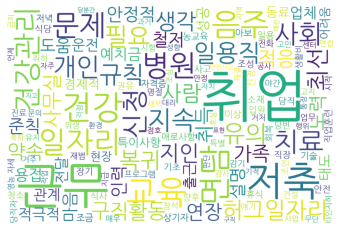

In [ ]:
wordcloud = WordCloud(font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' ,background_color='white',width=1500, height=1000).generate_from_frequencies(words2) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()
wordcloud.to_file('숙식_재범2번이상_wordcloud.png')

In [ ]:
word_list = sorted(words2.items(), key=lambda x: x[1], reverse=True)


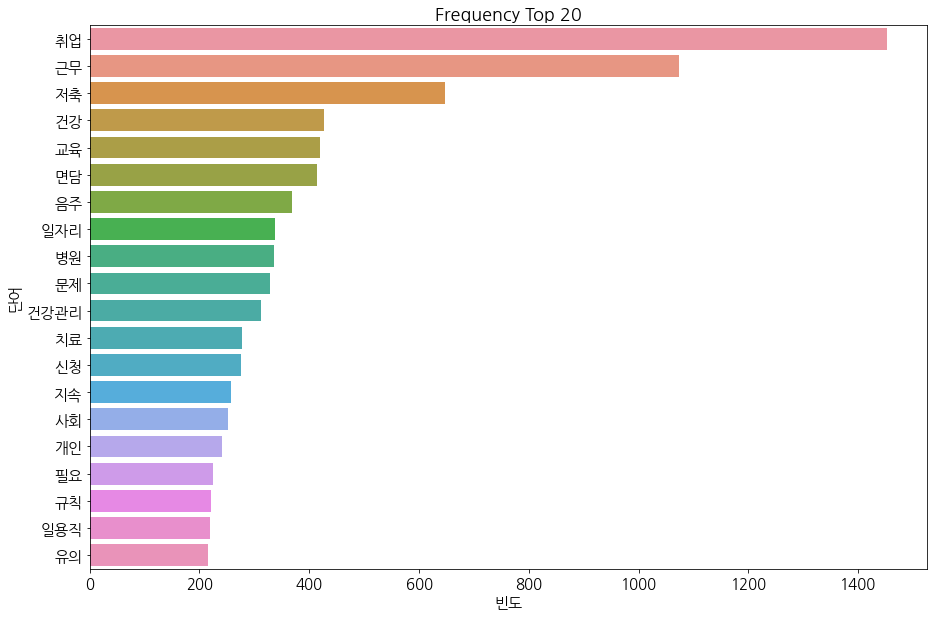

In [ ]:
plt.rc('font',size=15)
fontprop = fm.FontProperties(fname= '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', size=20)
fig = plt.figure(figsize=(15,10))
fig.patch.set_facecolor('white')
max = 20
sns_plot=sns.barplot([i[1] for i in word_list[:max]],
            [i[0] for i in word_list[:max]])
sns_plot.set_title("Frequency Top 20")
sns_plot.set_ylabel("단어")
sns_plot.set_xlabel("빈도")
fig = sns_plot.get_figure()
fig.savefig('숙식_재범2번이상_빈도.png')

#히트맵

In [ ]:
words0=twtt(df0)
words1=twtt(df1)
words2=twtt(df2)


In [ ]:
words_AA=words0
words_BB=words1
words_CC=words2

In [ ]:
#removewords = ['건강관리','유의','가족','교육','건강','신청','연장','복귀','태도','전달','사무실','지속','문제','생각','규칙','개인','사회','일자리','허그일자리','시험','최선','적응','마음','안정적','현장','노력','사람','관계','초범','취득','운전','필요','병원','장기','애로사항','특이사항','조금','신경','저녁','청소','출근','어려움','용접','업체','특별','직장','설명','권유','적극적','약속','성공','아보','동료','철저']

removewords = ['건강','교육','일자리','건강관리','병원','지속','문제','연장','신청','취득','생각','사회','개인','유의','최선','복귀','현장','사무실','적응','운전','구직활동','필요','출근','전달','시험','마음','특이사항','애로사항','노력','장기','업체','어려움','안정적','신경','가족','직장','사람','용접','조금','성공','규칙','아보','지인','권유','관계']

In [ ]:
for i in removewords:
  if i in words_AA:
    del words_AA[i]
  else:
    pass
for i in removewords:
  if i in words_BB:
    del words_BB[i]
  else:
    pass
for i in removewords:
  if i in words_CC:
    del words_CC[i]
  else:
    pass  


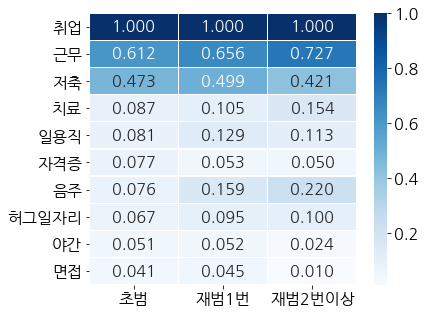

In [ ]:

df = pd.DataFrame([words_AA, words_BB, words_CC]).T
df.columns = ['초범', '재범1번', '재범2번이상']

df = df.apply(lambda x : x / np.sum(x))
df = df.apply(lambda x : (x-np.min(x)) / (np.max(x)-np.min(x))) #Heatmap에 상대적인 빈도수 출력하고싶을때

plt.rc('font',size=16)
figure = plt.figure(figsize=(6,5))
#figure = plt.figure(figsize=(10,8))
ax = plt.axes()
heat=sns.heatmap(df.sort_values(df.columns[0], ascending=False).iloc[:10], annot=True, fmt = '.3f', linewidths=0.3, cmap = 'Blues', ax = ax)
#ax.set_title('숙식 데이터')
plt.show()
# cbar는 오른쪽에 있는 막대(범주)를 표시 annot는 계수를 표시annot_kws는 글자 크기를 지정 fmt :소수점 자리수 지정 square는 정사각형으로 지정, False로 설정시 직사각형 cmap 색상을 지정
figure.savefig('숙식 데이터.png', format='png',dpi=1200)